In [3]:
# Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os


In [4]:
# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [5]:
# Load Cleaned DataFrame

df = pd.read_csv("../data/cleaned/cleaned_us_bank_deposits.csv")
df.head()


,rank,total_deposits,bank_name
0,1,2.601221e+12,JPMorgan Chase Bank
1,2,2.071624e+12,Bank of America
2,3,1.419560e+12,Wells Fargo Bank
3,4,1.361654e+12,Citibank
4,5,5.231021e+11,U.S. Bank


In [6]:
# Summary Statistics

df.describe()


,rank,total_deposits
count,4441.000000,4.441000e+03
mean,2220.966449,4.406613e+09
std,1282.093778,6.123169e+10
min,1.000000,0.000000e+00
25%,1111.000000,1.349040e+08
50%,2221.000000,3.110960e+08
75%,3331.000000,7.921060e+08
max,4435.000000,2.601221e+12


📊 Interpretation
✅ 1. Magnitude of Deposits
The median bank holds about $311 million in deposits.

But the largest bank holds $2.6 trillion, which is ~8,000× the median.

This shows extreme size variation in U.S. banks, which is normal in finance.

⚠️ 2. Skewness
Huge difference between mean ($4.4B) and median ($311M) → Right-skewed distribution

A small number of giant banks are pulling the mean up.

Log transformation is necessary for better visualization and model input.

🚨 3. Outliers
Max is $2.6 trillion, but 75% of the banks have less than $792 million.

The top ~10–20 banks are statistical outliers — but valid ones (e.g., JPMorgan Chase).

Outliers here are real-world (not errors), so we shouldn’t remove them unless we have a specific reason.


Text(0.5, 0, 'Total Deposits (USD)')

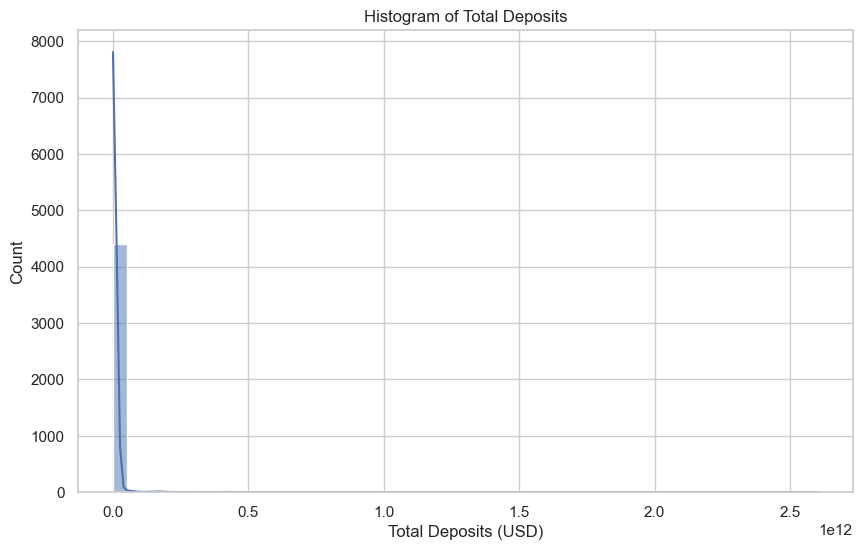

In [7]:
# Histogram (Raw)

sns.histplot(df["total_deposits"], kde=True, bins=50)
plt.title("Histogram of Total Deposits")
plt.xlabel("Total Deposits (USD)")


Text(0.5, 0, 'Log10(Total Deposits)')

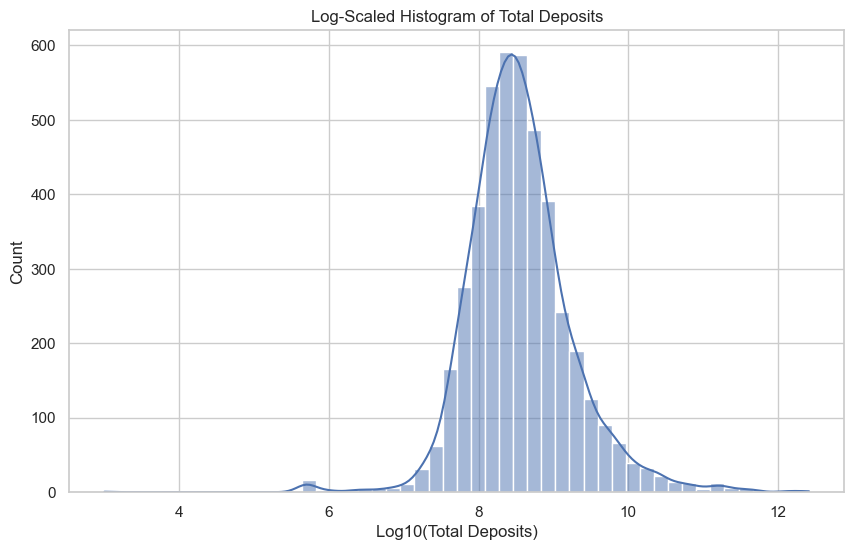

In [8]:
# Histogram (Log Scale)

import numpy as np
df["log_deposits"] = np.log10(df["total_deposits"].replace(0, np.nan))

sns.histplot(df["log_deposits"].dropna(), kde=True, bins=50)
plt.title("Log-Scaled Histogram of Total Deposits")
plt.xlabel("Log10(Total Deposits)")


Text(0.5, 1.0, 'Boxplot of Total Deposits')

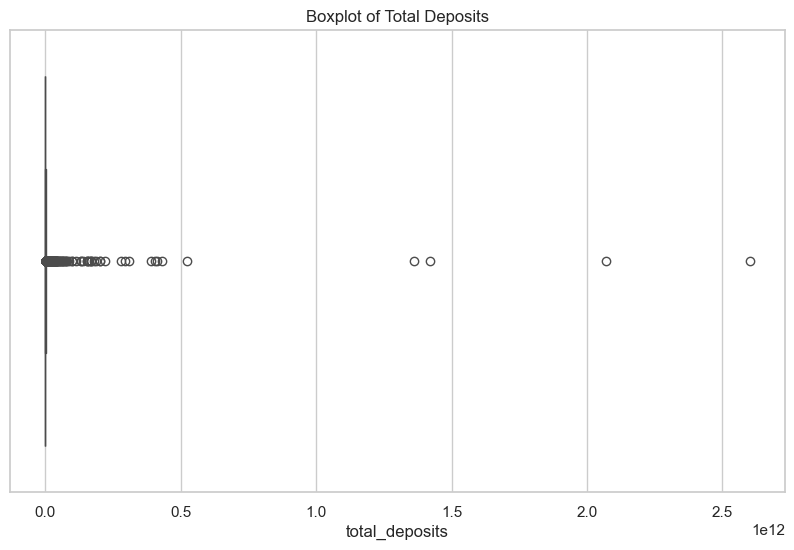

In [9]:
# Box Plot to see outliers

sns.boxplot(x=df["total_deposits"])
plt.title("Boxplot of Total Deposits")


In [10]:
# Top N Banks by Deposits

N = 10  # Change this to get more or fewer banks
df.sort_values("total_deposits", ascending=False).head(N)[["bank_name", "total_deposits"]]


,bank_name,total_deposits
0,JPMorgan Chase Bank,2.601221e+12
1,Bank of America,2.071624e+12
2,Wells Fargo Bank,1.419560e+12
3,Citibank,1.361654e+12
4,U.S. Bank,5.231021e+11
5,PNC Bank,4.295049e+11
6,Truist Bank,4.137810e+11
7,Goldman Sachs Bank USA,4.070860e+11
8,Capital One,3.887476e+11
9,The Bank of New York Mellon,3.107800e+11


## 📌 Summary

| Feature     | Observed              | Action                            |
|-------------|------------------------|------------------------------------|
| Outliers    | Valid, top ~1% banks   | Don’t remove, may visualize        |
| Skewness    | Strong right skew      | Use log-scale for modeling         |
| Magnitude   | 0 → trillions          | Normalize or scale if needed       |


In [11]:
# Top Banks by Deposits (Plotly)

top_10 = df.sort_values("total_deposits", ascending=False).head(10)

fig = px.bar(top_10,
             x="bank_name",
             y="total_deposits",
             title="Top 10 U.S. Banks by Total Deposits",
             text_auto=".3s")
fig.update_layout(xaxis_title="Bank", yaxis_title="Total Deposits (USD)", xaxis_tickangle=-45)
fig.show()


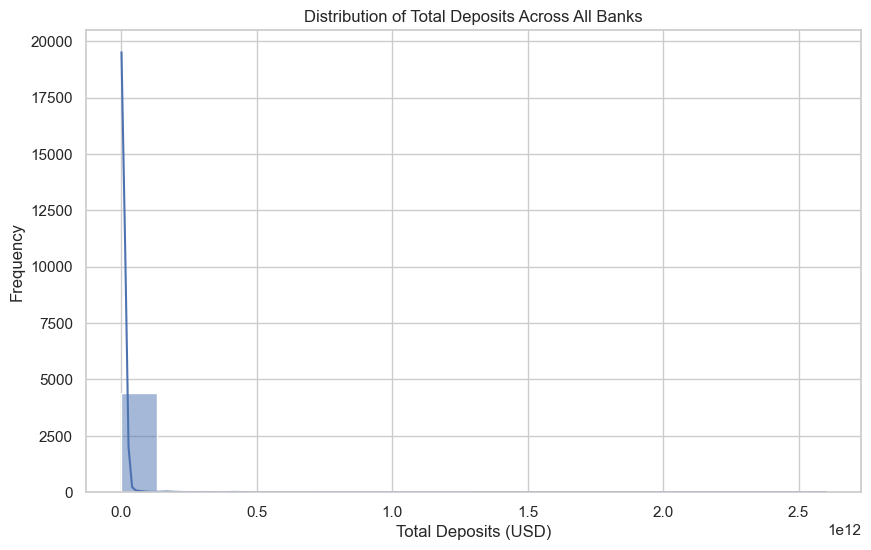

In [12]:
# Distribution of Total Deposits

sns.histplot(df["total_deposits"], kde=True, bins=20)
plt.title("Distribution of Total Deposits Across All Banks")
plt.xlabel("Total Deposits (USD)")
plt.ylabel("Frequency")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_42948\3308343702.py:3: RuntimeWarning:

divide by zero encountered in log10



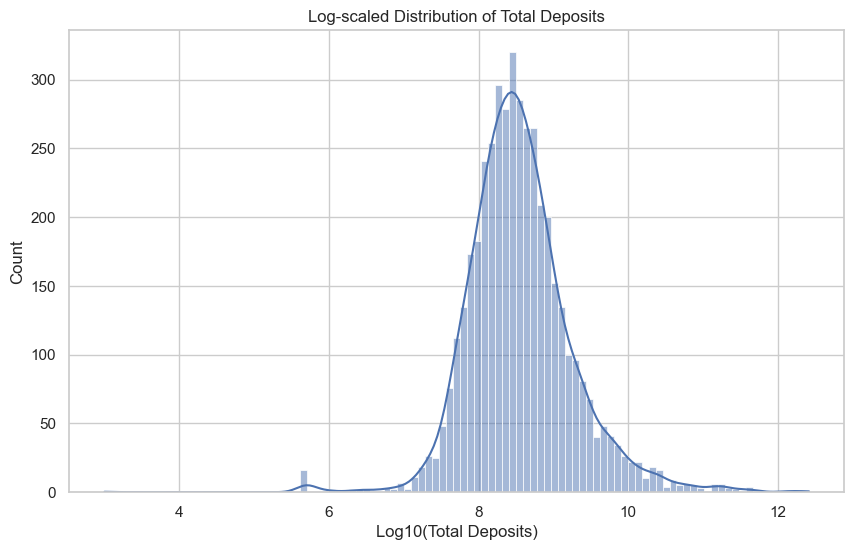

In [13]:
# Log Scale Visualization

df["log_deposits"] = df["total_deposits"].apply(lambda x: np.log10(x))

sns.histplot(df["log_deposits"], kde=True)
plt.title("Log-scaled Distribution of Total Deposits")
plt.xlabel("Log10(Total Deposits)")
plt.show()


In [15]:
# Deposite Share by Bank

df["deposit_share"] = df["total_deposits"] / df["total_deposits"].sum()

top_share = df.sort_values("deposit_share", ascending=False).head(10)
fig = px.pie(top_share,
             names="bank_name",
             values="deposit_share",
             title="Deposit Market Share of Top 10 Banks")
fig.show()


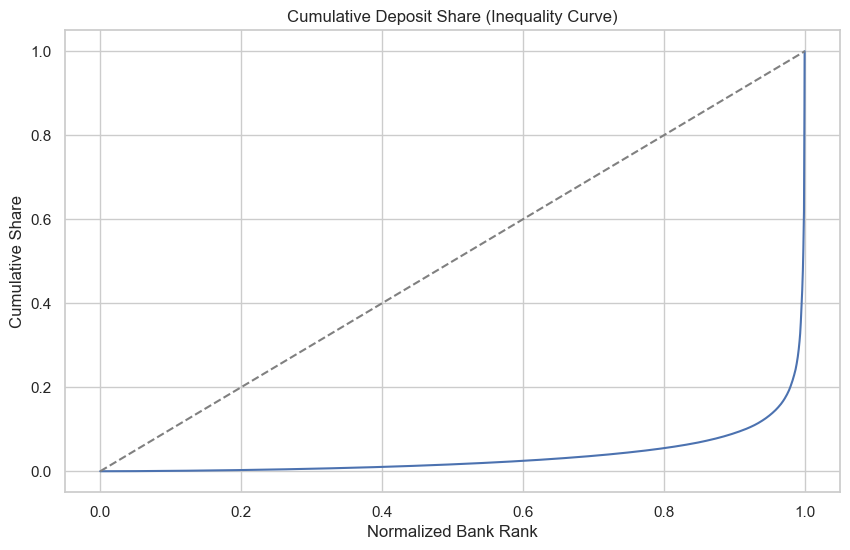

In [16]:
# Cumulative Share (Lorenz Curve)

df_sorted = df.sort_values("total_deposits", ascending=True).reset_index(drop=True)
df_sorted["cum_share"] = df_sorted["total_deposits"].cumsum() / df_sorted["total_deposits"].sum()
df_sorted["rank_norm"] = df_sorted.index / len(df_sorted)

plt.plot(df_sorted["rank_norm"], df_sorted["cum_share"])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Cumulative Deposit Share (Inequality Curve)")
plt.xlabel("Normalized Bank Rank")
plt.ylabel("Cumulative Share")
plt.grid(True)
plt.show()


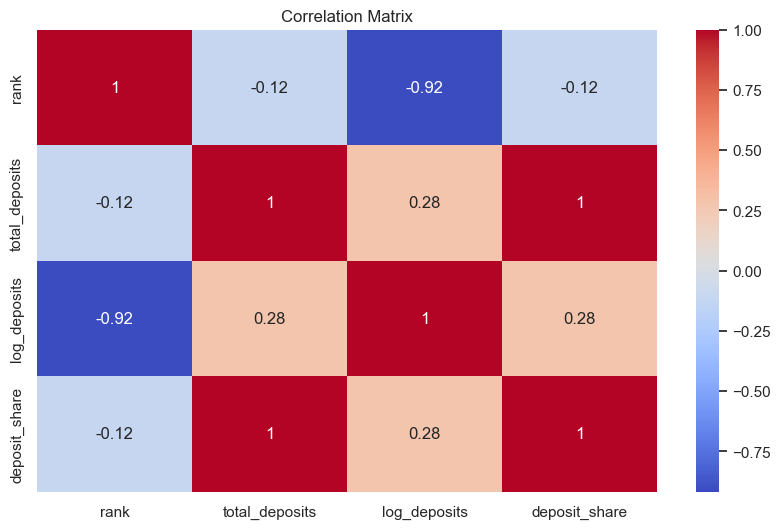

In [17]:
# Correlation Heatmap

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## 📊 Exploratory Data Analysis (EDA) Summary

### 📌 Dataset Overview
- **Total Banks Analyzed**: 4,441
- **Columns**: `rank`, `bank_name`, `total_deposits`

---

### 🧮 Summary Statistics for `total_deposits`

| Metric                  | Value                    |
|--------------------------|--------------------------|
| Mean                    | ~$4.41 billion           |
| Median                  | ~$311 million            |
| Min                     | $0                       |
| Max                     | ~$2.6 trillion           |
| Standard Deviation      | ~$61.2 billion           |
| 25th Percentile (Q1)    | ~$135 million            |
| 75th Percentile (Q3)    | ~$792 million            |

---

### 🔍 Key Observations

- **Right-Skewed Distribution**: The dataset exhibits a strong right skew — a few banks dominate the deposit market while most have relatively small holdings.
- **Valid Outliers**: Top banks like JPMorgan Chase, Bank of America, and Wells Fargo hold trillions in deposits and are valid but extreme outliers.
- **High Magnitude Spread**: Deposit values range from **$0 to $2.6 trillion**, reflecting massive inequality in bank sizes.

---

### 📈 Visual Insights

- **Raw Histogram**: Highlights a heavy concentration of banks with deposits under $1 billion.
- **Log-Scaled Histogram**: After applying `log10`, the distribution becomes much more normal, suitable for machine learning.
- **Boxplot**: Displays extreme upper outliers clearly, with long whiskers due to large-scale banks.
- **Top 10 Banks**: Clearly dominate the deposit market, as shown in both bar and pie charts.

---

### 🧠 Data Enrichment Performed

- ✅ Added `log_deposits`: logarithmic version of total deposits
- ✅ Optionally added `deposit_share`: each bank’s share of total deposits

---

### ⚠️ Recommendations

| Task                     | Recommendation                                       |
|--------------------------|------------------------------------------------------|
| Skew Handling            | Use `log10(deposits)` in modeling and clustering     |
| Outlier Management       | Do not remove — outliers are real and meaningful     |
| Feature Scaling          | Normalize `log_deposits` if used in ML               |
| Grouping by Bank Tier    | Create categories: small / mid / large banks         |


